Extracting /Users/sungchul/Dropbox/Data/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/sungchul/Dropbox/Data/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/sungchul/Dropbox/Data/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/sungchul/Dropbox/Data/MNIST/t10k-labels-idx1-ubyte.gz
Epoch :  0001 cost =  6.671692140
Epoch :  0051 cost =  6.647968150
Epoch :  0101 cost =  6.643137836
Epoch :  0151 cost =  6.638812256
Epoch :  0201 cost =  6.635753002
Epoch :  0251 cost =  6.633579056
Epoch :  0301 cost =  6.631978855
Epoch :  0351 cost =  6.630764954
Epoch :  0401 cost =  6.629818230
Epoch :  0451 cost =  6.629058853
Epoch :  0501 cost =  6.628439833
Epoch :  0551 cost =  6.627924922
Epoch :  0601 cost =  6.627492386
Epoch :  0651 cost =  6.627120767
Epoch :  0701 cost =  6.626801789
Epoch :  0751 cost =  6.626525785
Epoch :  0801 cost =  6.626279836
Epoch :  0851 cost =  6.626064341
Epoch :  0901 cost =  6.625872420
Epoch :  0951 cost =  6.625700208


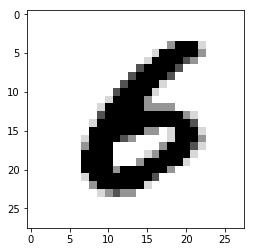

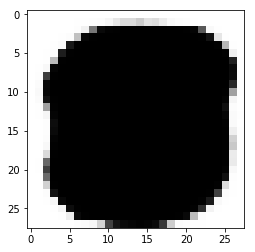

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from random import randint

LEARNING_RATE = 0.01
EPOCH_TRAIN = 1000
BATCH_SIZE = 100
DISPLY_STEP = 50

INPUT_SIZE = 784
BOTTLE_NECK_SIZE = 10
OUTPUT_SIZE = 784

try:
    data = input_data.read_data_sets("data/MNIST/", one_hot=True)
except:
    mnist = input_data.read_data_sets("/Users/sungchul/Dropbox/Data/MNIST/", one_hot=True)

x = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.truncated_normal(shape=(INPUT_SIZE, BOTTLE_NECK_SIZE), stddev=0.1), tf.float32, name='w1') 
b1 = tf.Variable(tf.zeros((1, BOTTLE_NECK_SIZE)), tf.float32, name='b1')

bottle_neck = tf.nn.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.truncated_normal(shape=(BOTTLE_NECK_SIZE, OUTPUT_SIZE), stddev=0.1), tf.float32, name='w2') 
b2 = tf.Variable(tf.zeros((1, OUTPUT_SIZE)), tf.float32, name='b2')

logits = tf.nn.sigmoid(tf.matmul(bottle_neck, w2) + b2) 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=x, logits=logits))
train = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # training
    for epoch in range(EPOCH_TRAIN):
        total_cost_this_epoch = 0.
        number_of_batch = int(mnist.train.num_examples / BATCH_SIZE)
        for i in range(number_of_batch):
            batch_xs, _ = mnist.train.next_batch(BATCH_SIZE)
            _, cost_this_batch = sess.run([train, cost], feed_dict={x: batch_xs})
            total_cost_this_epoch += cost_this_batch
        if epoch % DISPLY_STEP == 0:
            print("Epoch : ", '%04d' % (epoch + 1), "cost = ", "{:.9f}".format(total_cost_this_epoch / mnist.train.num_examples))

    # predict and show
    r = randint(0, mnist.test.num_examples - 1)
    input_img = mnist.test.images[r:r+1]
    output_img = sess.run(logits, feed_dict={x: mnist.test.images[r:r+1]})
    plt.imshow(input_img.reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    plt.imshow(output_img.reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()


# Exercise.

Improve the above code.